In [1]:
from chemwalker.gnps import Proteosafe
from chemwalker.utils import run_metfrag, walk_conn_comp, val_known
from chemwalker.draw import *
import pandas as pd
import numpy as np

In [2]:
taskid = 'be5004d4dd394fe8b883633fd75ea732'

gnps_result = Proteosafe(taskid, 'V2')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [3]:
net.head()

,CLUSTERID1,CLUSTERID2,DeltaMZ,MEH,Cosine,OtherScore,ComponentIndex,EdgeAnnotation
0,549,574,0.000,549.0,0.9488,549.0,1,
1,10,574,-15.995,10.0,0.8224,10.0,1,
2,10,549,-15.995,10.0,0.7616,10.0,1,
3,2,390,-84.147,2.0,0.8661,2.0,3,
4,1,2,-42.967,1.0,0.9744,1.0,3,


In [4]:
gnps_tab.head()

,AllGroups,DefaultGroups,EvenOdd,G1,G2,G3,G4,G5,G6,GNPSLinkout_Cluster,...,SpectrumID,UniqueFileSources,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153831,gnps_net_filtered_net1.mgf,1,1,3,1,319.086,1,319.086,0
1,,G1,0,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153832,gnps_net_filtered_net1.mgf,1,2,3,1,362.053,1,362.053,0
2,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153833,gnps_net_filtered_net1.mgf,1,3,3,1,311.027,1,311.027,0
3,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,gnps_net_filtered_net1.mgf,1,4,55,1,393.135,1,393.135,0
4,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153946,gnps_net_filtered_net1.mgf,1,5,94,1,310.216,1,310.216,0


In [5]:
gnps_tab.shape

(610, 28)

In [6]:
len(spectra)

610

In [7]:
spectra[0]

{'params': {'pepmass': (319.08591, None),
  'charge': [1],
  'mslevel': '2',
  'filename': 'spec-00000.mgf',
  'instrument': 'ion trap',
  'title': 'Scan Number: 1',
  'scans': '1'},
 'm/z array': array([ 94., 141., 153., 180., 181., 185.]),
 'intensity array': array([  2.,   3., 111.,   3., 999.,   1.]),
 'charge array': masked_array(data=[--, --, --, --, --, --],
              mask=[ True,  True,  True,  True,  True,  True],
        fill_value=0,
             dtype=int64)}

In [8]:
db = pd.read_csv('validation_db.psv', sep='|')
nist = pd.read_csv('nist17_selected_db_ccms.txt', sep='\t')
db = pd.concat([db, nist]).reset_index(drop=True)
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [9]:
nset = list(set(net['ComponentIndex']))
nset[4]

6

In [10]:
net['ComponentIndex'].value_counts().to_dict()

{6: 321,
 4: 173,
 26: 93,
 33: 68,
 23: 60,
 5: 57,
 34: 57,
 37: 50,
 36: 40,
 11: 34,
 12: 30,
 15: 21,
 19: 17,
 28: 17,
 22: 14,
 21: 12,
 55: 12,
 10: 12,
 24: 11,
 17: 10,
 13: 10,
 9: 8,
 7: 8,
 14: 8,
 46: 6,
 3: 6,
 63: 6,
 30: 6,
 18: 4,
 50: 4,
 32: 3,
 1: 3,
 42: 3,
 45: 3,
 54: 3,
 -1: 3,
 67: 3,
 79: 3,
 44: 2,
 47: 2,
 83: 2,
 40: 2,
 39: 2,
 29: 2,
 56: 2,
 20: 1,
 80: 1,
 82: 1,
 78: 1,
 77: 1,
 16: 1,
 25: 1,
 84: 1,
 81: 1,
 62: 1,
 76: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 8: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 85: 1,
 73: 1,
 75: 1,
 74: 1,
 60: 1,
 59: 1,
 58: 1,
 57: 1,
 64: 1,
 65: 1,
 53: 1,
 52: 1,
 51: 1,
 97: 1,
 49: 1,
 48: 1,
 66: 1,
 43: 1,
 68: 1,
 41: 1,
 38: 1,
 69: 1,
 70: 1,
 35: 1,
 71: 1,
 72: 1,
 61: 1,
 98: 1}

In [11]:
match_tab.head()

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
0,1,M+H,NaN,1,"2-((4,6-Dimethyl-2-pyrimidinyl)thio)-N-(3-nitr...",Standard,NIST,318.079,spectra/specs_ms.pklbin1,InChI=1S/C14H14N4O3S/c1-9-6-10(2)16-14(15-9)22...,...,0,6,CC1=CC(=NC(=N1)SCC(=O)NC2=CC(=CC=C2)[N+](=O)[O...,1,319.086,spectra/specs_ms.pklbin,CCMSLIB00003153831,1119.00,UPDATE-SINGLE-ANNOTATED-GOLD,
1,10,M+H,NaN,1,Promethazine,Standard,NIST,284.135,spectra/specs_ms.pklbin10,InChI=1S/C17H20N2S/c1-13(18(2)3)12-19-14-8-4-6...,...,0,15,CC(CN1C2=CC=CC=C2SC3=CC=CC=C31)N(C)C,1,285.142,spectra/specs_ms.pklbin,CCMSLIB00003161305,2553.64,UPDATE-SINGLE-ANNOTATED-GOLD,
2,100,M+H,NaN,1,N-(15Z-Tetracosenoyl)-1-.beta.-galactosylsphin...,Standard,NIST,809.674,spectra/specs_ms.pklbin100,InChI=1S/C48H91NO8/c1-3-5-7-9-11-13-15-17-18-1...,...,0,22,CCCCCCCCCCCCCC=CC(C(COC1C(C(C(C(O1)CO)O)O)O)NC...,1,810.682,spectra/specs_ms.pklbin,CCMSLIB00003154790,1463.06,UPDATE-SINGLE-ANNOTATED-GOLD,
3,101,M+H,NaN,1,.alpha.-Galactosyl-N-stearoylsphingosine,Standard,NIST,727.596,spectra/specs_ms.pklbin101,InChI=1S/C42H81NO8/c1-3-5-7-9-11-13-15-17-18-2...,...,0,21,CCCCCCCCCCCCCCCCCC(=O)NC(COC1C(C(C(C(O1)CO)O)O...,1,728.604,spectra/specs_ms.pklbin,CCMSLIB00003154791,2520.19,UPDATE-SINGLE-ANNOTATED-GOLD,
4,102,M+H,NaN,1,Gln-Gly,Standard,NIST,203.091,spectra/specs_ms.pklbin102,InChI=1S/C7H13N3O4/c8-4(1-2-5(9)11)7(14)10-3-6...,...,0,11,C(CC(=O)N)C(C(=O)NCC(=O)[O-])[NH3+],1,204.098,spectra/specs_ms.pklbin,CCMSLIB00003154823,1771.23,UPDATE-SINGLE-ANNOTATED-GOLD,


In [28]:
snet = net[net['ComponentIndex']==63]
nds = list(set(snet['CLUSTERID1'].tolist()+snet['CLUSTERID2'].tolist()))

len(nds)

4

In [29]:
otabgnps = match_tab.copy().loc[match_tab['#Scan#'].isin(nds)]

# Define fixed number o seeds to start walk, mostly for validation
seed_ctr = 0.1 # 10% of seeds in a given connected component
seed_ctr = np.ceil(sum(otabgnps['INCHI']!='')*seed_ctr)
seed_ctr = int(seed_ctr)

# Remove known structures for validation
exid =  otabgnps.index[seed_ctr:]
otabgnps.loc[exid, 'INCHI'] = ''
otabgnps.loc[exid, 'Smiles'] = ''
otabgnps

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
210,291,M+H,NaN,1,Gallicacid,Standard,NIST,170.022,spectra/specs_ms.pklbin291,InChI=1S/C7H6O5/c8-4-1-3(7(11)12)2-5(9)6(4)10/...,...,0,8,C1=C(C=C(C(=C1O)O)O)C(=O)O,1,171.029,spectra/specs_ms.pklbin,CCMSLIB00003156650,4751.94,UPDATE-SINGLE-ANNOTATED-GOLD,
223,302,M+H,NaN,1,n-Propylgallate,Standard,NIST,212.068,spectra/specs_ms.pklbin302,,...,0,9,,1,213.076,spectra/specs_ms.pklbin,CCMSLIB00003156672,3419.57,UPDATE-SINGLE-ANNOTATED-GOLD,
448,515,M+H,NaN,1,Ethylgallate,Standard,NIST,198.053,spectra/specs_ms.pklbin515,,...,0,9,,1,199.060,spectra/specs_ms.pklbin,CCMSLIB00003162567,2773.72,UPDATE-SINGLE-ANNOTATED-GOLD,
572,80,M+H,NaN,1,"2,6-Dihydroxybenzoicacid",Standard,NIST,154.027,spectra/specs_ms.pklbin80,,...,0,7,,1,155.034,spectra/specs_ms.pklbin,CCMSLIB00003161146,3302.49,UPDATE-SINGLE-ANNOTATED-GOLD,


In [30]:
tlid = walk_conn_comp(net=net, spectra=spectra, tabgnps=gnps_tab.copy(), 
                      dbmatch=otabgnps.copy(), db=db, comp_index=63)

Component with 4 nodes
Calculating in silico fragmentation with MetFrag...
in silico fragmentation done in: 8.010339736938477 seconds
Calculating pairwise candidate similarities...
similarities done in: 11.586715936660767 seconds
Seed - InChIKey1:LNTHITQWFMADLM, cluster index:291, Identifier:CCMSLIB00003156650
Walking on the graph...
walking done in: 0.4806818962097168 seconds


In [31]:
tlid.shape

(167, 18)

In [32]:
tlid['cluster index'].value_counts()

302    81
515    57
80     28
291     1
Name: cluster index, dtype: int64

In [33]:
val_known(tlid, match_tab)

[{'cluster index': 80, 'metfrag': 5, 'rw': 7},
 {'cluster index': 291, 'metfrag': 0, 'rw': 0},
 {'cluster index': 302, 'metfrag': 46, 'rw': 7},
 {'cluster index': 515, 'metfrag': 33, 'rw': 5}]

In [34]:
tlid.columns

Index(['Score', 'InChI', 'FragmenterScore_Values', 'MaximumTreeDepth',
       'SmilesOfExplPeaks', 'MonoisotopicMass', 'Identifier',
       'MolecularFormula', 'FormulasOfExplPeaks', 'InChIKey2', 'InChIKey1',
       'FragmenterScore', 'ExplPeaks', 'NoExplPeaks', 'NumberPeaksUsed',
       'cluster index', 'uid', 'chw_prob'],
      dtype='object')

/home/rsilva/miniconda3/envs/chemwalker/lib/python3.7/site-packages/chemwalker-0.0.1-py3.7.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


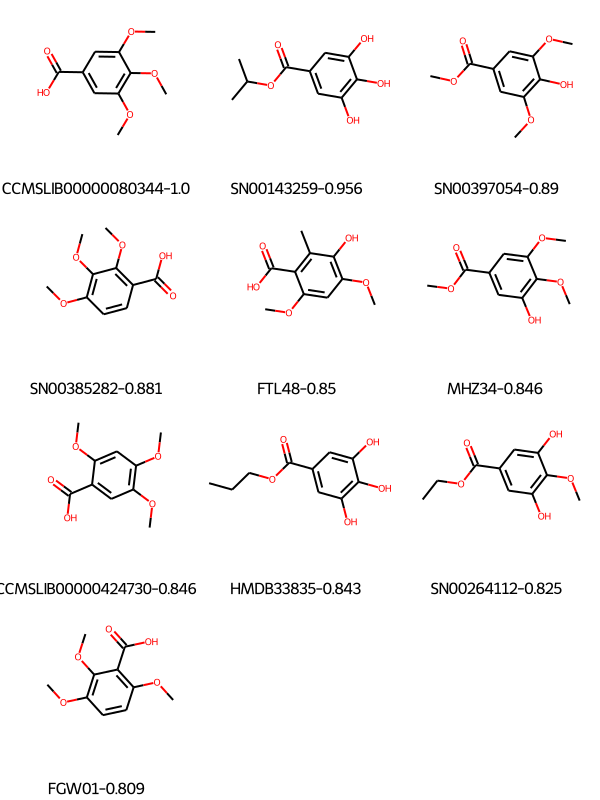

In [35]:
plotPannel(tlid, clusterid=302)

/home/rsilva/miniconda3/envs/chemwalker/lib/python3.7/site-packages/chemwalker-0.0.1-py3.7.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


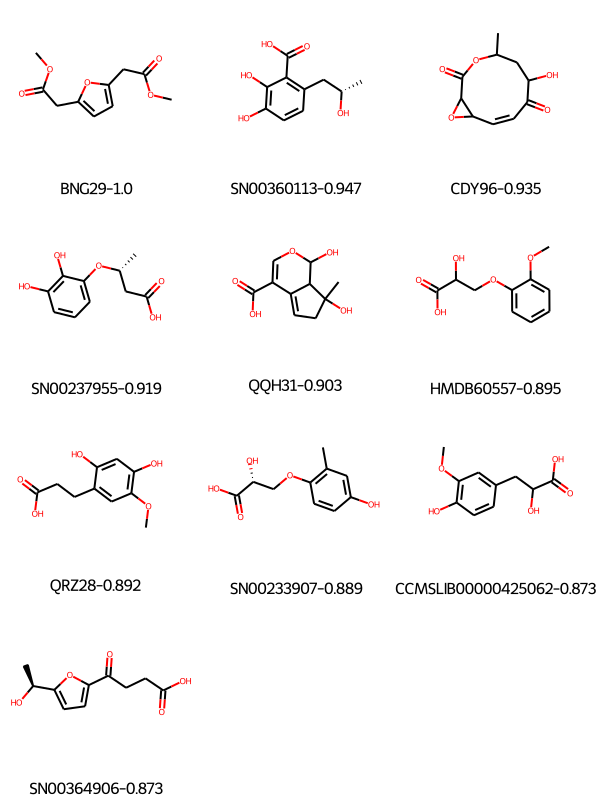

In [36]:
plotPannel(tlid, clusterid=302, score='Score')

In [ ]:
otabgnps.columns

In [39]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(otabgnps.copy(), gnps_tab.copy(), tlid, net, method='MF',
         dr='figs', comp=63, option=1, pos_scale=100)
    
plotGraph(otabgnps.copy(), gnps_tab.copy(), tlid, net, method='RW',
         dr='figs', comp=63, option=1, pos_scale=100)

In [33]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(otabgnps, gnps_tab.copy(), tlid, net, method='RW',
         dr='figs', clusterid=40, pos_scale=200)

plotGraph(otabgnps, gnps_tab.copy(), tlid, net, method='MF',
         dr='figs', clusterid=40, pos_scale=200)

In [40]:
from chemwalker.rwalker import *

In [41]:
tlid.head()

,Score,InChI,FragmenterScore_Values,MaximumTreeDepth,SmilesOfExplPeaks,MonoisotopicMass,Identifier,MolecularFormula,FormulasOfExplPeaks,InChIKey2,InChIKey1,FragmenterScore,ExplPeaks,NoExplPeaks,NumberPeaksUsed,cluster index,uid,chw_prob
0,1.000000,InChI=1S/C7H6O4/c8-4-2-1-3-5(9)7(11)6(4)10/h1-...,1056.0;1256.0;960.0;1256.0;1156.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,JJH76,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,HQLHJCFATKAUSO,139.66,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_JJH76,0.407572
1,0.987850,InChI=1S/C7H6O4/c8-5-2-1-4(7(10)11)3-6(5)9/h1-...,1572.0;1772.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,CCMSLIB00000578319,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,YQUVCSBJEUQKSH,137.963,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000578319,1.000000
2,0.987850,InChI=1S/C7H6O4/c8-5-3-1-2-4(6(5)9)7(10)11/h1-...,1572.0;1772.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c]([c][c])[c];53.038399:[c]([c][c])...,154.027,CCMSLIB00000578312,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,GLDQAMYCGOIJDV,137.963,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000578312,0.927451
3,0.987375,InChI=1S/C7H6O4/c8-4-1-2-6(9)5(3-4)7(10)11/h1-...,1584.0;1784.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,CCMSLIB00000221503,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,WXTMDXOMEHJXQO,137.897,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000221503,0.871643
4,0.987375,InChI=1S/C7H6O4/c8-4-1-2-5(7(10)11)6(9)3-4/h1-...,1584.0;1784.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,HMDB29666,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,UIAFKZKHHVMJGS,137.897,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_HMDB29666,0.857099


In [42]:
tlid.tail()

,Score,InChI,FragmenterScore_Values,MaximumTreeDepth,SmilesOfExplPeaks,MonoisotopicMass,Identifier,MolecularFormula,FormulasOfExplPeaks,InChIKey2,InChIKey1,FragmenterScore,ExplPeaks,NoExplPeaks,NumberPeaksUsed,cluster index,uid,chw_prob
162,0.386739,InChI=1S/C10H12O5/c1-3-13-9(11)7-5-8(15-6-7)10...,1903.0;1291.0;2067.0;1803.0;708.0,2,41.040001:[c]([c])[c];55.019001:[C]([C])O[C];8...,212.068,FTQ89,C10H12O5,41.040001:[C3H2+2H]+H+;55.019001:[C3H5O-2H]+;8...,UHFFFAOYSA,SRFTWVUIYBQPHK,45.5611,41.040001_263.5;55.019001_320.0;81.035004_999....,5,9,302,302_FTQ89,0.331700
163,0.349891,InChI=1S/C10H12O5/c1-13-8-4-7(12)6(5-11)9(14-2...,1324.0;1684.0;1584.0;1684.0,2,55.019001:[c]([c])O[C];107.014:c([C]=O)([c][c]...,212.068,SN00159107,C10H12O5,55.019001:[C3H4O-H]+;107.014:[C6H4O2-H]+;109.0...,UHFFFAOYSA,UZKDLTZUNKKEGE,41.2201,55.019001_320.0;107.014_385.1;109.029999_89.8;...,4,9,302,302_SN00159107,0.619797
164,0.151466,InChI=1S/C10H12O5/c1-4-7(11)8-6-5(9(12)15-8)2-...,1156.0;1392.0;796.0,2,41.040001:[C]([C])[C];55.019001:[C]=[C]O[C];15...,212.068,SN00401861,C10H12O5,41.040001:[C3H3+H]+H+;55.019001:[C3H3O]+;153.0...,ZOQAJNJPSA,CLHRRLZEKMQHFZ,17.8439,41.040001_263.5;55.019001_320.0;153.020996_17.1,3,9,302,302_SN00401861,0.267158
165,0.139218,InChI=1S/C10H12O5/c1-3-6-7-5-4(8(11)14-7)9(15-...,1404.0;1516.0;1404.0,2,41.040001:[C]([C])[C];53.040001:[C]([C])[C][C]...,212.068,POC58,C10H12O5,41.040001:[C3H5]+;53.040001:[C4H6-H]+;55.01900...,UHFFFAOYSA,UCYJAMRRXNXQJP,16.4011,41.040001_263.5;53.040001_615.4;55.019001_320.0,3,9,302,302_POC58,0.262493
166,1.000000,InChI=1S/C7H6O5/c8-4-1-3(7(11)12)2-5(9)6(4)10/...,,,,,CCMSLIB00003156650,,,,LNTHITQWFMADLM,,,,,291,291_CCMSLIB00003156650,1.000000


In [43]:
tlid['cluster index'].unique()

array([ 80, 515, 302, 291])

In [44]:
match_tab.columns

Index(['#Scan#', 'Adduct', 'CAS_Number', 'Charge', 'Compound_Name',
       'Compound_Source', 'Data_Collector', 'ExactMass', 'FileScanUniqueID',
       'INCHI', 'INCHI_AUX', 'Instrument', 'IonMode', 'Ion_Source', 'LibMZ',
       'LibraryName', 'LibraryQualityString', 'Library_Class', 'MQScore',
       'MZErrorPPM', 'MassDiff', 'MoleculeExplorerDatasets',
       'MoleculeExplorerFiles', 'NumberHits', 'Organism', 'PI', 'Precursor_MZ',
       'Pubmed_ID', 'RT_Query', 'SharedPeaks', 'Smiles', 'SpecCharge',
       'SpecMZ', 'SpectrumFile', 'SpectrumID', 'TIC_Query',
       'UpdateWorkflowName', 'tags'],
      dtype='object')

In [74]:
from rdkit import Chem

match_tab['inchikey1'] = [Chem.InchiToInchiKey(x) for x in match_tab.INCHI]

match_tab['inchikey1'] = [x.split('-')[0] if x!=None else '' for x in match_tab.inchikey1]

RDKit ERROR: [14:26:00] Invalid InChI prefix in generating InChI Key


In [75]:
tlid['cluster index'].isin(match_tab['#Scan#'].unique())

0      True
1      True
2      True
3      True
4      True
       ... 
162    True
163    True
164    True
165    True
166    True
Name: cluster index, Length: 167, dtype: bool

In [76]:
tlid['InChIKey1'].isin(match_tab['inchikey1']).sum()

5

In [79]:
tlid2 = tlid.copy()[tlid['InChIKey1'].isin(match_tab['inchikey1'])]
tlid2.drop(131, inplace=True)

In [90]:
tlist = []

for x in tlid2.index:
    tmp = tlid.copy()
    tmp = tmp[(tmp['cluster index']==tlid2.loc[x, 'cluster index']) & (tmp['uid']!=tlid2.loc[x, 'uid'])]
    tlist.append(tmp.iloc[:4, :])

tlist.append(tlid2)

In [91]:
tlid2 = pd.concat(tlist)

tlid2

,Score,InChI,FragmenterScore_Values,MaximumTreeDepth,SmilesOfExplPeaks,MonoisotopicMass,Identifier,MolecularFormula,FormulasOfExplPeaks,InChIKey2,InChIKey1,FragmenterScore,ExplPeaks,NoExplPeaks,NumberPeaksUsed,cluster index,uid,chw_prob
0,1.000000,InChI=1S/C7H6O4/c8-4-2-1-3-5(9)7(11)6(4)10/h1-...,1056.0;1256.0;960.0;1256.0;1156.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,JJH76,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,HQLHJCFATKAUSO,139.66,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_JJH76,0.407572
1,0.987850,InChI=1S/C7H6O4/c8-5-2-1-4(7(10)11)3-6(5)9/h1-...,1572.0;1772.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,CCMSLIB00000578319,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,YQUVCSBJEUQKSH,137.963,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000578319,1.000000
2,0.987850,InChI=1S/C7H6O4/c8-5-3-1-2-4(6(5)9)7(10)11/h1-...,1572.0;1772.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c]([c][c])[c];53.038399:[c]([c][c])...,154.027,CCMSLIB00000578312,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,GLDQAMYCGOIJDV,137.963,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000578312,0.927451
3,0.987375,InChI=1S/C7H6O4/c8-4-1-2-6(9)5(3-4)7(10)11/h1-...,1584.0;1784.0;1224.0;1672.0;448.0;360.0,2,51.022701:[c][c][c][c];53.038399:[c][c][c][c];...,154.027,CCMSLIB00000221503,C7H6O4,51.022701:[C4H2]+H+;53.038399:[C4H2+2H]+H+;55....,UHFFFAOYSA,WXTMDXOMEHJXQO,137.897,51.022701_128.2;53.038399_839.2;55.017601_926....,6,7,80,80_CCMSLIB00000221503,0.871643
28,1.000000,InChI=1S/C9H10O5/c1-6(10)13-5-7-3-4-8(14-7)9(1...,1815.0;1715.0;1291.0;808.0;708.0;820.0;720.0;3...,2,51.0228:[c][c][c][C];53.038399:[c][c][c][C];55...,198.053,OQP74,C9H10O5,51.0228:[C4H4-H]+;53.038399:[C4H4]+H+;55.0177:...,UHFFFAOYSA,MLFVJSCPDCRDDZ,123.549,51.0228_338.1;53.038399_370.3;55.0177_268.1;79...,9,9,515,515_OQP74,0.527212
29,0.968010,InChI=1S/C9H10O5/c1-13-7-4-6(2-3-8(10)11)14-9(...,1156.0;1056.0;708.0;1168.0;1056.0;708.0;808.0;...,2,51.0228:[C][C][c][c];53.038399:[C][C][c][c];55...,198.053,QVY21,C9H10O5,51.0228:[C4H4-H]+;53.038399:[C4H4]+H+;55.0177:...,UHFFFAOYSA,ANMIXQYGZDPTLJ,119.597,51.0228_338.1;53.038399_370.3;55.0177_268.1;79...,9,9,515,515_QVY21,0.514006
30,0.945458,InChI=1S/C9H10O5/c1-6(11)9(14)7(5-10)3-2-4-8(1...,696.0;796.0;696.0;708.0;708.0;348.0;796.0,2,55.0177:[C]=[C][C]=O;79.017601:[C]([C]=[C])=[C...,198.053,QMS86,C9H10O5,55.0177:[C3H2O]+H+;79.017601:[C5H4O-H]+;81.033...,KTVKLFPBSA,NPMXYYRWPBGOFO,116.811,55.0177_268.1;79.017601_450.4;81.033302_999.0;...,7,9,515,515_QMS86,0.499821
31,0.920232,InChI=1S/C9H10O5/c1-13-8(11)5-3-7(10)4-6-9(12)...,696.0;796.0;696.0;708.0;808.0;708.0;720.0,2,55.0177:[C](=[C])[C]=O;79.017601:[C](=[C])C([C...,198.053,LRZ41,C9H10O5,55.0177:[C3H2O]+H+;79.017601:[C5H4O-H]+;81.033...,GGWOSOGESA,LNYFCQSSMWMOKV,113.694,55.0177_268.1;79.017601_450.4;81.033302_999.0;...,7,9,515,515_LRZ41,0.492772
85,1.000000,InChI=1S/C10H12O5/c1-13-9(11)5-7-3-4-8(15-7)6-...,1803.0;1803.0;1703.0;1291.0;796.0;696.0;708.0;...,2,41.040001:[c]([c])[C];51.023998:[c]([c])[c][C]...,212.068,BNG29,C10H12O5,41.040001:[C3H3+H]+H+;51.023998:[C4H4-H]+;53.0...,UHFFFAOYSA,NGPMJNXSTRHDBA,117.808,41.040001_263.5;51.023998_334.1;53.040001_615....,9,9,302,302_BNG29,0.469724
86,0.947303,InChI=1S/C10H12O5/c1-5(11)4-6-2-3-7(12)9(13)8(...,708.0;1672.0;1572.0;1224.0;1772.0;1572.0;696.0...,2,41.040001:[C]([C])[C];51.023998:[c][c][c][C];5...,212.068,SN00360113,C10H12O5,41.040001:[C3H5]+;51.023998:[C4H4-H]+;53.04000...,YFKPBYRVSA,IVEQIIIJZASWOD,111.6,41.040001_263.5;51.023998_334.1;53.040001_615....,9,9,302,302_SN00360113,0.641884


In [92]:
snet

,CLUSTERID1,CLUSTERID2,DeltaMZ,MEH,Cosine,OtherScore,ComponentIndex,EdgeAnnotation
1215,80,291,-15.995,80.0,0.9008,80.0,63,
1216,291,515,-28.031,291.0,0.8064,291.0,63,
1217,80,515,-44.026,80.0,0.8426,80.0,63,
1218,80,302,-58.042,80.0,0.7890,80.0,63,
1219,302,515,14.016,302.0,0.9506,302.0,63,methanol (-H2O):CH2
1220,291,302,-42.047,291.0,0.9016,291.0,63,


In [93]:
scandpair = cand_pair(snet, tlid2, method='RDKit7-linear')
scandpair.head()

,12,13,11
0,80_JJH76,291_CCMSLIB00003156650,0.326080
1,80_CCMSLIB00000578319,291_CCMSLIB00003156650,0.937703
2,80_CCMSLIB00000578312,291_CCMSLIB00003156650,0.860819
3,80_CCMSLIB00000221503,291_CCMSLIB00003156650,0.804094
4,80_HMDB13676,291_CCMSLIB00003156650,0.709775


In [94]:
graph = nx.Graph()
edge_list = scandpair.apply(lambda a: tuple(a), axis=1).tolist()
graph.add_weighted_edges_from(edge_list)

graph.nodes()

NodeView(('80_JJH76', '291_CCMSLIB00003156650', '80_CCMSLIB00000578319', '80_CCMSLIB00000578312', '80_CCMSLIB00000221503', '80_HMDB13676', '515_OQP74', '515_QVY21', '515_QMS86', '515_LRZ41', '515_HMDB33836', '302_BNG29', '302_SN00360113', '302_CDY96', '302_SN00237955', '302_CCMSLIB00000207957'))

In [121]:
seed  = ['291_CCMSLIB00003156650'] 
restart_prob=0.8 
step=0 
epsilon=0.000001
niter=10000 
sparce_matrix = False

p_0 = set_up_p0(seed, graph)
thresh = 1
p_t = np.copy(p_0)
#sys.getsizeof(sog_not_normalized)
# print small matrix to inspect col normalization
# plot network with 3 nodes
if sparce_matrix:
    w = nx.to_scipy_sparse_matrix(graph)
else:
    w = nx.to_numpy_matrix(graph)
w = normalize_cols(w)
c = 0
#while (thresh > epsilon and c < niter):
c += 1
# first, calculate p^(t + 1) from p^(t)
#p_t_1 = calculate_next_p(p_t, p_0)
# p^{t+1} = (1-r)Wp^t+rp^0
# np.dot matrix multiplication
# Understand the role of re-start
if sparce_matrix:
    walk = w.dot(p_t)
else:
    walk = np.squeeze(np.asarray(np.dot(w, p_t)))
no_restart = walk * (1 - restart_prob)
restart = p_0 * restart_prob
p_t_1 = np.add(no_restart, restart)
if step:
    pass
# calculate L1 norm of difference between p^(t + 1) and p^(t),
# for checking the convergence condition
thresh = np.linalg.norm(np.subtract(p_t_1, p_t), 1)
# then, set p^(t) = p^(t + 1), and loop again if necessary
# no deep copy necessary here, we're just renaming p
#p_t = p_t_1
    


NameError: name 'plt' is not defined

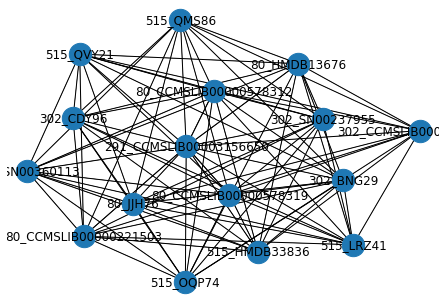

In [100]:
net_plt(graph, 0.05)

In [101]:
p_0

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
len(p_0)

16

In [102]:
w

array([[0.        , 0.04654606, 0.        , 0.        , 0.        ,
        0.        , 0.09158205, 0.09249809, 0.09275569, 0.09283074,
        0.06516441, 0.0912913 , 0.07866857, 0.09166807, 0.09396886,
        0.09301087],
       [0.10113772, 0.        , 0.22154886, 0.21031074, 0.20252932,
        0.18738796, 0.09362905, 0.09314229, 0.09314746, 0.09322649,
        0.1426925 , 0.09220287, 0.11226719, 0.09205632, 0.09611986,
        0.09482032],
       [0.        , 0.1338517 , 0.        , 0.        , 0.        ,
        0.        , 0.09335117, 0.09276872, 0.09261204, 0.09268665,
        0.14222998, 0.09145922, 0.09994231, 0.09143286, 0.09292566,
        0.09369151],
       [0.        , 0.12287696, 0.        , 0.        , 0.        ,
        0.        , 0.09330932, 0.09265384, 0.09260531, 0.09267862,
        0.11931005, 0.0914448 , 0.10789042, 0.091394  , 0.09308803,
        0.0936579 ],
       [0.        , 0.11477972, 0.        , 0.        , 0.        ,
        0.        , 0.09332968, 

In [104]:
w.shape

(16, 16)

In [105]:
np.squeeze(np.asarray(np.dot(w, p_t)))

array([0.04622003, 0.02877535, 0.11809377, 0.10897952, 0.10220779,
       0.09102808, 0.04743783, 0.04647277, 0.04525265, 0.04467113,
       0.08090082, 0.04717222, 0.06312134, 0.04523806, 0.04752247,
       0.03690619])

In [106]:
np.dot(w, p_t)

array([0.04622003, 0.02877535, 0.11809377, 0.10897952, 0.10220779,
       0.09102808, 0.04743783, 0.04647277, 0.04525265, 0.04467113,
       0.08090082, 0.04717222, 0.06312134, 0.04523806, 0.04752247,
       0.03690619])

In [107]:
p_t_1

array([0.00924401, 0.80575507, 0.02361876, 0.02179591, 0.02044156,
       0.01820562, 0.00948756, 0.00929455, 0.00905053, 0.00893422,
       0.01618016, 0.00943444, 0.01262427, 0.00904761, 0.00950449,
       0.00738124])

In [108]:
len(p_t_1)

16

In [109]:
w = nx.to_numpy_matrix(graph)
w

matrix([[0.        , 0.32608011, 0.        , 0.        , 0.        ,
         0.        , 0.3041513 , 0.30223217, 0.29513429, 0.29138311,
         0.26332439, 0.30438267, 0.30075164, 0.29349049, 0.30577938,
         0.2374101 ],
        [0.32608011, 0.        , 0.93770298, 0.86081902, 0.80409352,
         0.70977544, 0.31094955, 0.30433705, 0.29638084, 0.29262531,
         0.57660947, 0.30742204, 0.42919985, 0.29473356, 0.31277885,
         0.24202874],
        [0.        , 0.93770298, 0.        , 0.        , 0.        ,
         0.        , 0.3100267 , 0.30311644, 0.29467721, 0.29093085,
         0.57474047, 0.30494255, 0.38208158, 0.29273743, 0.30238474,
         0.23914745],
        [0.        , 0.86081902, 0.        , 0.        , 0.        ,
         0.        , 0.3098877 , 0.30274107, 0.2946558 , 0.29090564,
         0.48212277, 0.30489449, 0.4124674 , 0.29261303, 0.3029131 ,
         0.23906166],
        [0.        , 0.80409352, 0.        , 0.        , 0.        ,
         0.    

In [110]:
w[:,0]

matrix([[0.        ],
        [0.32608011],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.3041513 ],
        [0.30223217],
        [0.29513429],
        [0.29138311],
        [0.26332439],
        [0.30438267],
        [0.30075164],
        [0.29349049],
        [0.30577938],
        [0.2374101 ]])

In [115]:
normalize_cols(w)[:,0].sum()

1.0

In [116]:
normalize_cols(w)[:,0]

array([0.        , 0.10113772, 0.        , 0.        , 0.        ,
       0.        , 0.09433623, 0.09374099, 0.0915395 , 0.09037602,
       0.08167327, 0.094408  , 0.09328179, 0.09102965, 0.0948412 ,
       0.07363564])

In [117]:
w[:,0]/w[:,0].sum()

matrix([[0.        ],
        [0.10113772],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.09433623],
        [0.09374099],
        [0.0915395 ],
        [0.09037602],
        [0.08167327],
        [0.094408  ],
        [0.09328179],
        [0.09102965],
        [0.0948412 ],
        [0.07363564]])

In [122]:
np.subtract(p_t_1, p_t)

array([ 0.00930921, -0.2       ,  0.02677034,  0.02457539,  0.02295594,
        0.02026327,  0.00887725,  0.00868847,  0.00846133,  0.00835412,
        0.01646154,  0.00877655,  0.01225316,  0.0084143 ,  0.00892948,
        0.00690964])

In [123]:
np.linalg.norm(np.subtract(p_t_1, p_t), 1)

0.39999999999999997

In [136]:
#https://en.wikipedia.org/wiki/Norm_(mathematics)
np.sum(np.abs(np.subtract(p_t_1, p_t)))

0.39999999999999997

In [138]:
random_walk(graph, seed)

array([0.00924401, 0.80575507, 0.02361876, 0.02179591, 0.02044156,
       0.01820562, 0.00948756, 0.00929455, 0.00905053, 0.00893422,
       0.01618016, 0.00943444, 0.01262427, 0.00904761, 0.00950449,
       0.00738124])

In [142]:
random_walk(graph, seed, restart_prob=0.6, epsilon=0.1)

array([0.01778543, 0.62441322, 0.03997063, 0.03711219, 0.03497057,
       0.03147337, 0.02044182, 0.0200384 , 0.01950975, 0.01925635,
       0.03224336, 0.02045251, 0.02636306, 0.01961811, 0.02042975,
       0.01592148])

In [143]:
def random_walk(graph, seed, restart_prob=0.8, step=0, epsilon=0.000001,
                niter=10000, sparce_matrix = True):
    p_0 = set_up_p0(seed, graph)
    thresh = 1
    p_t = np.copy(p_0)
    #sys.getsizeof(sog_not_normalized)
    # print small matrix to inspect col normalization
    # plot network with 3 nodes
    if sparce_matrix:
        w = nx.to_scipy_sparse_matrix(graph)
    else:
        w = nx.to_numpy_matrix(graph)
    w = normalize_cols(w)
    c = 0
    while (thresh > epsilon and c < niter):
        c += 1
        # first, calculate p^(t + 1) from p^(t)
        #p_t_1 = calculate_next_p(p_t, p_0)
        # p^{t+1} = (1-r)Wp^t+rp^0
        # np.dot matrix multiplication
        # Understand the role of re-start
        if sparce_matrix:
            walk = w.dot(p_t)
        else:
            walk = np.squeeze(np.asarray(np.dot(w, p_t)))
        no_restart = walk * (1 - restart_prob)
        restart = p_0 * restart_prob
        p_t_1 = np.add(no_restart, restart)
        if step:
            return p_t_1
        # calculate L1 norm of difference between p^(t + 1) and p^(t),
        # for checking the convergence condition
        thresh = np.linalg.norm(np.subtract(p_t_1, p_t), 1)
        # then, set p^(t) = p^(t + 1), and loop again if necessary
        # no deep copy necessary here, we're just renaming p
        p_t = p_t_1
    return p_t_1
